In [ ]:
!pip install gdown

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
import gdown
import zipfile
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

from PIL import Image
from shutil import copy2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
# from google.colab import files, drive
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Link Dataset Terbaru
gdown.download(f'https://drive.google.com/uc?id=1Jh8EumXOilphcp2wb1GT3ReFl37WJ2uW', '/content/', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Jh8EumXOilphcp2wb1GT3ReFl37WJ2uW
From (redirected): https://drive.google.com/uc?id=1Jh8EumXOilphcp2wb1GT3ReFl37WJ2uW&confirm=t&uuid=dc8f93a9-84b8-44b4-881d-ad3e0969fad4
To: /content/Motif_Batik_Dataset.zip
100%|██████████| 330M/330M [00:03<00:00, 86.6MB/s]


'/content/Motif_Batik_Dataset.zip'

In [ ]:
# Extract the dataset
zip_ref = zipfile.ZipFile('/content/Motif_Batik_Dataset.zip', 'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [ ]:
# Define Directories for Dataset
base_dir = '/tmp/dataset/Motif_Batik_Dataset'

train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Create directories for train, val, and test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all class names (folder names)
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Create class directories in train, val, and test folders
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

In [ ]:
# Split data
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)
    images = [img for img in images if os.path.isfile(os.path.join(cls_dir, img))]

    train_imgs, temp_imgs = train_test_split(images, test_size=0.2, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for img in train_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(train_dir, cls))
    for img in val_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(val_dir, cls))
    for img in test_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(test_dir, cls))

In [ ]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

testing_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(360,360),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(360,360),
    class_mode='categorical',
    batch_size=32
)

testing_generator = testing_datagen.flow_from_directory(
    test_dir,
    target_size=(360,360),
    class_mode='categorical',
    batch_size=32,
)

Found 3535 images belonging to 15 classes.
Found 441 images belonging to 15 classes.
Found 448 images belonging to 15 classes.


In [ ]:
# Menggunakan Transfer Learning
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(360,360,3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# base_model.summary()

In [ ]:
model = tf.keras.Sequential([
            base_model,
            # This is the first convolution
            tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # This is the second convolution
            tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # tf.keras.layers.Flatten(),
            tf.keras.layers.GlobalAveragePooling2D(),
            # tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(15, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Tanpa Transfer Learning
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5), #diperbesar
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(15, activation='softmax')
# ])

# # kalo nambah dropout = memperkecil akurasi -> balikin dropout, tambah conv layer

# # Print the model summary
# model.summary()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check the loss
    if(logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91):

      # Stop if threshold is met
      print("\nAccuracy is above 0.91 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1, callbacks=[early_stopping])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.1829 - loss: 2.4806 - val_accuracy: 0.5193 - val_loss: 1.5179
Epoch 2/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.4986 - loss: 1.5205 - val_accuracy: 0.6531 - val_loss: 1.0977
Epoch 3/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.6339 - loss: 1.1254 - val_accuracy: 0.6848 - val_loss: 0.9073
Epoch 4/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6786 - loss: 0.9694 - val_accuracy: 0.7302 - val_loss: 0.8519
Epoch 5/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7256 - loss: 0.8436 - val_accuracy: 0.7415 - val_loss: 0.7354
Epoch 6/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7547 - loss: 0.7748 - val_accuracy: 0.7937 - val_loss: 0.5923
Epoch 7/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7945 - loss: 0.6240 - val_accuracy: 0.7846 - val_loss: 0.6399
Epoch 8/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8064 - loss: 0.5908 - val_accuracy: 0.802

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Melakukan Prediksi
predictions = model.predict(testing_generator)
test_loss, test_accuracy = model.evaluate(testing_generator)
print(f'Test Accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.8869 - loss: 0.3230
Test Accuracy: 0.8772321343421936


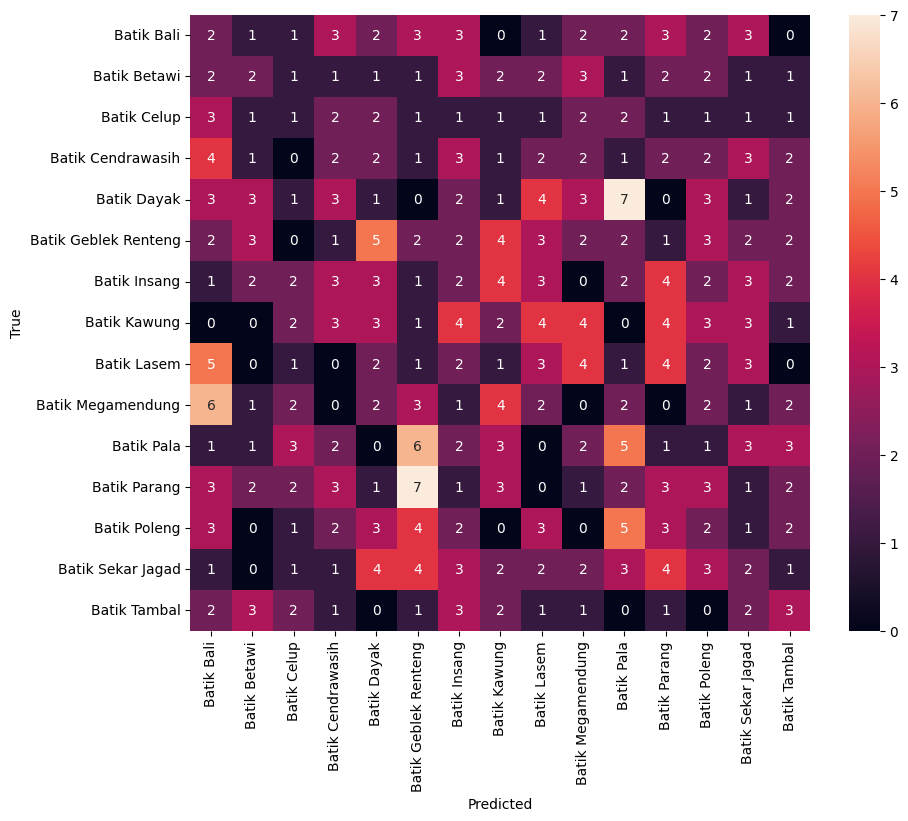

                      precision    recall  f1-score   support

          Batik Bali       0.05      0.07      0.06        28
        Batik Betawi       0.10      0.08      0.09        25
         Batik Celup       0.05      0.05      0.05        21
   Batik Cendrawasih       0.07      0.07      0.07        28
         Batik Dayak       0.03      0.03      0.03        34
Batik Geblek Renteng       0.06      0.06      0.06        34
        Batik Insang       0.06      0.06      0.06        34
        Batik Kawung       0.07      0.06      0.06        34
         Batik Lasem       0.10      0.10      0.10        29
   Batik Megamendung       0.00      0.00      0.00        28
          Batik Pala       0.14      0.15      0.15        33
        Batik Parang       0.09      0.09      0.09        34
        Batik Poleng       0.06      0.06      0.06        31
   Batik Sekar Jagad       0.07      0.06      0.06        33
        Batik Tambal       0.12      0.14      0.13        22

      

In [ ]:
predicted_classes = predictions.argmax(axis=-1)
true_classes = testing_generator.classes
class_labels = list(testing_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# F1 Score
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
# SavedModel
saved_model_path = "./my_model.h5"
model.save(saved_model_path)

In [ ]:
# Tensorflow.js
!tensorflowjs_converter --input_format=keras {saved_model_path} ./
!zip filebin.zip *.bin model.json

2024-06-08 15:48:46.955151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file
  adding: group1-shard10of16.bin (deflated 7%)
  adding: group1-shard11of16.bin (deflated 7%)
  adding: group1-shard12of16.bin (deflated 7%)
  adding: group1-shard13of16.bin (deflated 7%)
  adding: group1-shard14of16.bin (deflated 7%)
  adding: group1-shard15of16.bin (deflated 7%)
  adding: group1-shard16of16.bin (deflated 7%)
  adding: group1-shard1of16.bin (deflated 7%)
  adding: group1-shard2of16.bin (deflated 7%)
  adding: group1-shard3of16.bin (deflated 7%)
  adding: group1-shard4of16.bin (deflated 7%)
  adding: group1-shard5of16.bin (deflated 7%)
  adding: group1-shard6of16.bin (deflated 7%)
  adding: group1-shard7of16.bin (deflated 7%)
  adding: group1-shard8of16.bin (deflated 7%)
  adding: group1-shard9of16.bin (deflated 7%)
  adding: model.json (deflated 92%)


In [ ]:
# Convert the model with Tensorflow Lite
BATIK_SAVED_MODEL = "batik_saved_model"
tf.saved_model.save(model, BATIK_SAVED_MODEL)

In [ ]:
%%bash -s $BATIK_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['inputs'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 360, 360, 3)
      name: serving_default_inputs:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output_0'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 15)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2024-06-08 15:48:57.004722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(BATIK_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'inputs': TensorSpec(shape=(None, 360, 360, 3), dtype=tf.float32, name='inputs')})
{'output_0': TensorSpec(shape=(None, 15), dtype=tf.float32, name='output_0')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("batik_saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
# Melihat hasil predict pada data testing
# # Mendapatkan nama kelas dari generator
# class_indices = train_generator.class_indices
# # Membalikkan dictionary untuk mendapatkan nama kelas dari indeks
# labels = {v: k for k, v in class_indices.items()}

# # Mengambil label asli dari testing_generator
# true_classes = testing_generator.classes
# # Mendapatkan nama kelas dari label asli
# true_labels = [labels[i] for i in true_classes]

# # Mendapatkan nama file dari testing_generator
# filenames = testing_generator.filenames

# for i, pred in enumerate(predictions):
#     # Membulatkan nilai probabilitas menjadi 3 angka di belakang koma
#     rounded_classes = np.round(pred, 3)

#     # Mendapatkan indeks kelas dengan prediksi tertinggi
#     predicted_class_index = np.argmax(pred)
#     predicted_class_label = labels[predicted_class_index]

#     # Mendapatkan label asli dari indeks
#     true_label = true_labels[i]

#     print(f"File: {filenames[i]}")
#     print(f"True class: {true_label}")
#     print(f"Predicted class: {predicted_class_label} (index: {predicted_class_index})")
#     print(f"Prediction probabilities: {rounded_classes}")
#     print()